Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
55000 (55000, 784) (55000,)
(55000, 1)
5000 (5000, 784) (5000,)
(5000, 1)
(10000, 1)


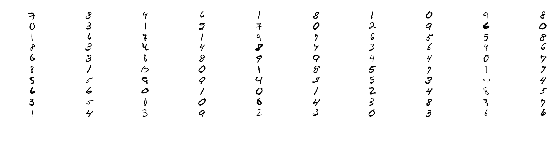

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/tmp/data",one_hot=False)

ntrain = mnist.train.num_examples
Xtrain = mnist.train.images
ytrain = mnist.train.labels
print(ntrain,Xtrain.shape,ytrain.shape)
ytrain = ytrain.reshape(ntrain,1)
print(ytrain.shape)

nvalidation = mnist.validation.num_examples
Xvalidation = mnist.validation.images
yvalidation = mnist.validation.labels
print(nvalidation,Xvalidation.shape,yvalidation.shape)
yvalidation = yvalidation.reshape(nvalidation,1)
print(yvalidation.shape)

ntest = mnist.test.num_examples
Xtest = mnist.test.images
ytest = mnist.test.labels
ytest = ytest.reshape(ntest,1)
print(ytest.shape)

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")
    
%matplotlib inline
plt.figure(figsize=(10,20))
for iteration in range(100):
    plt.subplot(100, 10, iteration + 1)
    plot_image(Xtrain[iteration,:])


In [2]:
# Ridge regression with SGD
n_inputs = 28 * 28

Xmean = np.mean(Xtrain,axis=0) # mean of data vector
ymean = np.mean(ytrain,axis=0) # bias of the model

X = tf.placeholder(tf.float32,[None, n_inputs])
Xm = X - Xmean # data centering
y = tf.placeholder(tf.float32,[None, 1       ])
XmT = tf.transpose(Xm)

lr = 0.001 # learning rate
lam_val = 10 # regularization parameter

theta = tf.Variable(tf.random_normal([n_inputs,1])) # parameter of the linear model
yp = tf.matmul(Xm,theta)+ymean # predicted y
error = yp - y
# mean squared error as loss function
mse = 0.5 * tf.reduce_mean(tf.square(error)) + 0.5 * lam_val * tf.reduce_mean(tf.square(theta))

#optimizer = tf.train.GradientDescentOptimizer(learning_rate = lr) # tensorflow optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = lr) # another better optimizer
#gradient = tf.matmul(XmT,error) + lam_val * theta
#training_op = tf.assign(theta, theta - lr * gradient)

training_op = optimizer.minimize(mse)

y1 = tf.placeholder(tf.float32,[None, 1])
y2 = tf.placeholder(tf.float32,[None, 1])
acc = 100.0*tf.reduce_mean(tf.cast(tf.equal(y1,y2),tf.float32))

init = tf.global_variables_initializer()

n_epochs = 100
batch_size = 200

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        # compute model
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            y_batch = y_batch.reshape(batch_size,1)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        
        if epoch%10 == 0:
            theta_value = theta.eval()
            # prediction on training set
            yp_train = yp.eval(feed_dict={X:Xtrain, theta:theta_value})
            acc_train = acc.eval(feed_dict={y1:ytrain, y2:np.round(yp_train)})
            regerr_train = tf.reduce_mean(tf.square(yp_train-ytrain)).eval()
        
            # prediction on validation set
            yp_validation = yp.eval(feed_dict={X:Xvalidation, theta:theta_value})
            acc_validation = acc.eval(feed_dict={y1:yvalidation, y2:np.round(yp_validation)})
            regerr_validation = tf.reduce_mean(tf.square(yp_validation-yvalidation)).eval()        
                    
            print(regerr_train, regerr_validation, acc_train, acc_validation)
            
        theta_value = theta.eval()
    # Now that the model is trained, it is the test time!
    yp_test = yp.eval(feed_dict={X:Xtest, theta:theta_value})
    acc_test = acc.eval(feed_dict={y1:ytest, y2:np.round(yp_test)})
    print(acc_test)


23.7925 22.7942 8.12182 8.7
4.49345 4.35591 18.9291 18.38
3.44733 3.32792 20.9055 20.84
3.32409 3.18992 21.2891 21.56
3.31043 3.17329 20.9673 21.1
3.30908 3.16802 21.2145 21.48
3.30878 3.17192 21.0255 21.3
3.30732 3.17413 21.2236 20.96
3.30731 3.16153 21.5436 21.92
3.30927 3.17552 20.8545 20.88
19.97


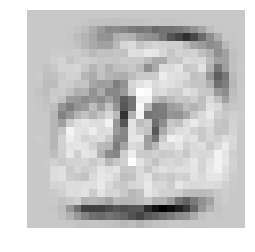

In [3]:
import matplotlib
import matplotlib.pyplot as plt

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")
    
%matplotlib inline
plot_image(theta_value)